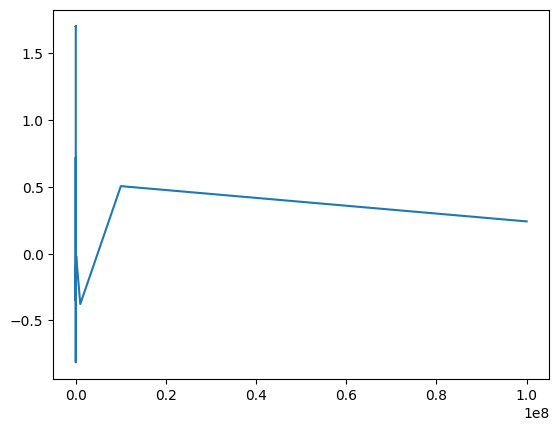

In [19]:
import matplotlib.pyplot as plt
import numpy as onp
import jax.numpy as np
import jax.scipy as jsp
from functools import reduce
from jax.config import config
from kernels import matern_five_halfs as k
config.update("jax_enable_x64", True)

ks = [k]*3

d = 3

sigmas = np.array([0, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
z_scores = np.zeros_like(sigmas)
for index in range(len(sigmas)):
    x1s = np.linspace(-2, 2, 100)
    x2s = np.linspace(-2, 2, 100) ** 2
    x3s = (-1 - x1s - 2 * x2s) / 3 + sigmas[index] * onp.random.normal(size = 100)

    fig = plt.figure
    X = np.array([x1s, x2s, x3s])
    gamma = 1e-13

    Ys = X[2]
    Ms = {}
    for j in range(2):
        Ms[j] = 1 + ks[j](X[j], X[j]) #ks has to be indexed for possible_ancestors:

    Kxx = reduce(np.multiply, list(Ms.values()))
    nuggeted_matrix = Kxx + gamma * np.eye(len(Kxx)) #Kxx

    L = np.linalg.cholesky(nuggeted_matrix)
    LinvY = jsp.linalg.solve_triangular(L, Ys, lower=True)
    mtxinvY = jsp.linalg.solve_triangular(L.T, LinvY, lower=False)
    nominator = np.dot(mtxinvY, mtxinvY)
    denominator = np.dot(LinvY, LinvY)

    alpha = nominator / denominator

    D = np.linalg.eigvals(nuggeted_matrix).real
    trace_inv1 = np.sum(1 / D)
    trace_inv2 = np.sum(1 / D**2)
    trace_inv3 = np.sum(1 / D**3)
    trace_inv4 = np.sum(1 / D**4)

    EA = alpha * trace_inv1 - trace_inv2
    VarA = 2 * trace_inv4 + alpha**2 * trace_inv2 - 2 * alpha * trace_inv3

    z_score = - EA / np.sqrt(VarA)

    z_scores = z_scores.at[index].set(z_score)


plt.plot(sigmas, z_scores)
plt.show()

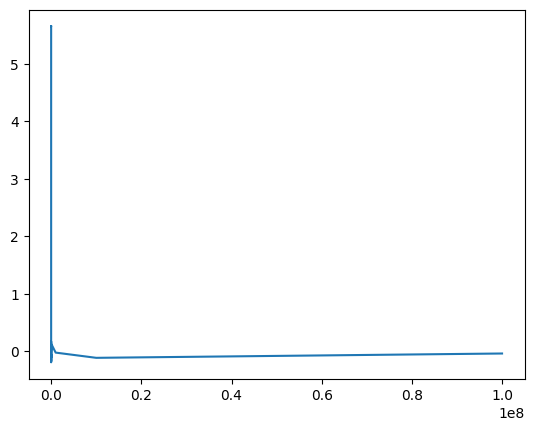

In [20]:
import matplotlib.pyplot as plt
import numpy as onp
import jax.numpy as np
import jax.scipy as jsp
from functools import reduce
from jax.config import config
from kernels import gaussian as k
config.update("jax_enable_x64", True)

ks = [k]*3

d = 3

sigmas = np.array([0, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
z_scores = np.zeros_like(sigmas)
for index in range(len(sigmas)):
    x1s = np.linspace(-2, 2, 100)
    x2s = np.linspace(-2, 2, 100) ** 2
    x3s = (-1 - x1s - 2 * x2s) / 3 + sigmas[index] * onp.random.normal(size = 100)

    fig = plt.figure
    X = np.array([x1s, x2s, x3s])
    gamma = 1e-13

    Ys = X[2]
    Ms = {}
    for j in range(2):
        Ms[j] = 1 + ks[j](X[j], X[j]) #ks has to be indexed for possible_ancestors:

    Kxx = reduce(np.multiply, list(Ms.values()))
    nuggeted_matrix = Kxx + gamma * np.eye(len(Kxx)) #Kxx

    L = np.linalg.cholesky(nuggeted_matrix)
    LinvY = jsp.linalg.solve_triangular(L, Ys, lower=True)
    mtxinvY = jsp.linalg.solve_triangular(L.T, LinvY, lower=False)
    nominator = np.dot(mtxinvY, mtxinvY)
    denominator = np.dot(LinvY, LinvY)

    alpha = nominator / denominator

    D = np.linalg.eigvals(nuggeted_matrix).real
    trace_inv1 = np.sum(1 / D)
    trace_inv2 = np.sum(1 / D**2)
    trace_inv3 = np.sum(1 / D**3)
    trace_inv4 = np.sum(1 / D**4)

    EA = alpha * trace_inv1 - trace_inv2
    VarA = 2 * trace_inv4 + alpha**2 * trace_inv2 - 2 * alpha * trace_inv3

    z_score = - EA / np.sqrt(VarA)

    z_scores = z_scores.at[index].set(z_score)


plt.plot(sigmas, z_scores)
plt.show()

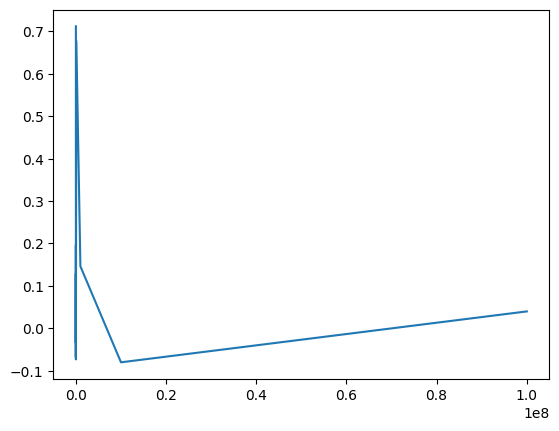

In [26]:
import matplotlib.pyplot as plt
import numpy as onp
import jax.numpy as np
import jax.scipy as jsp
from functools import reduce
from jax.config import config
from kernels import gaussian as k
config.update("jax_enable_x64", True)

ks = [lambda v1, v2: k(v1, v2, 1, 0.1)]*3

d = 3

sigmas = np.array([0, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
z_scores = np.zeros_like(sigmas)
for index in range(len(sigmas)):
    x1s = np.linspace(-2, 2, 100)
    x2s = np.linspace(-2, 2, 100) ** 2
    x3s = (-1 - x1s - 2 * x2s) / 3 + sigmas[index] * onp.random.normal(size = 100)

    fig = plt.figure
    X = np.array([x1s, x2s, x3s])
    gamma = 1e-13

    Ys = X[2]
    Ms = {}
    for j in range(2):
        Ms[j] = 1 + ks[j](X[j], X[j]) #ks has to be indexed for possible_ancestors:

    Kxx = reduce(np.multiply, list(Ms.values()))
    nuggeted_matrix = Kxx + gamma * np.eye(len(Kxx)) #Kxx

    L = np.linalg.cholesky(nuggeted_matrix)
    LinvY = jsp.linalg.solve_triangular(L, Ys, lower=True)
    mtxinvY = jsp.linalg.solve_triangular(L.T, LinvY, lower=False)
    nominator = np.dot(mtxinvY, mtxinvY)
    denominator = np.dot(LinvY, LinvY)

    alpha = nominator / denominator

    D = np.linalg.eigvals(nuggeted_matrix).real
    trace_inv1 = np.sum(1 / D)
    trace_inv2 = np.sum(1 / D**2)
    trace_inv3 = np.sum(1 / D**3)
    trace_inv4 = np.sum(1 / D**4)

    EA = alpha * trace_inv1 - trace_inv2
    VarA = 2 * trace_inv4 + alpha**2 * trace_inv2 - 2 * alpha * trace_inv3

    z_score = - EA / np.sqrt(VarA)

    z_scores = z_scores.at[index].set(z_score)


plt.plot(sigmas, z_scores)
plt.show()